In [3]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

n = 100
np.random.seed(0)
X = 5 * np.random.rand(n, 1)
y = np.sin(X).ravel()
noise_num = (int)(n / 5)
# 每隔5个样本，就在该样本的值上添加噪音
y[::5] += 2 * (np.random.rand(noise_num) - 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=1) 
X_train[:10]

array([[3.08817749],
       [1.44703046],
       [4.72334459],
       [1.05191281],
       [4.71874039],
       [0.48550638],
       [0.02347738],
       [1.04438378],
       [0.91595681],
       [2.87973248]])

Training score:1.000000
Testing score:0.898869


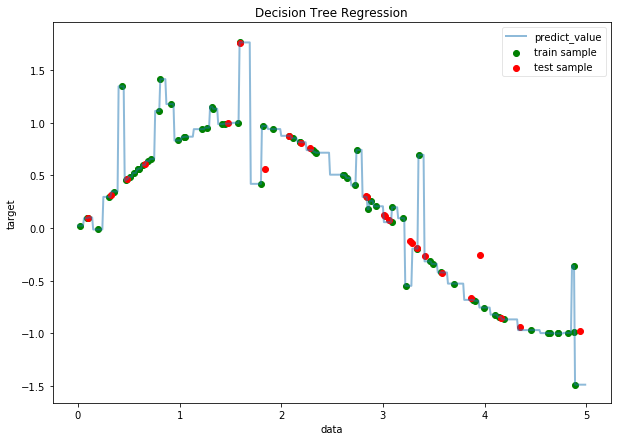

In [10]:
def test_DecisionTreeRegressor(*data):
    X_train, X_test, y_train, y_test = data
    regr = DecisionTreeRegressor() 
    # 默认 max_depth=None 直到所有叶节点都是单个样本,此时训练集的评分为1
    regr.fit(X_train, y_train)
    print("Training score:%f" % (regr.score(X_train, y_train)))
    print("Testing score:%f" % (regr.score(X_test, y_test)))
    
    ##绘图
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    X = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    Y = regr.predict(X)
    ax.scatter(X_train, y_train, label="train sample", c='g')
    ax.scatter(X_test, y_test, label="test sample", c='r')
    ax.plot(X, Y, label="predict_value", linewidth=2, alpha=0.5)
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
    
test_DecisionTreeRegressor(X_train, X_test, y_train, y_test)

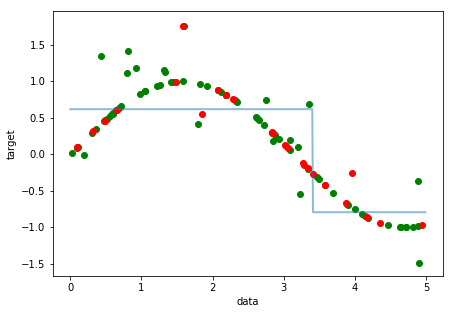

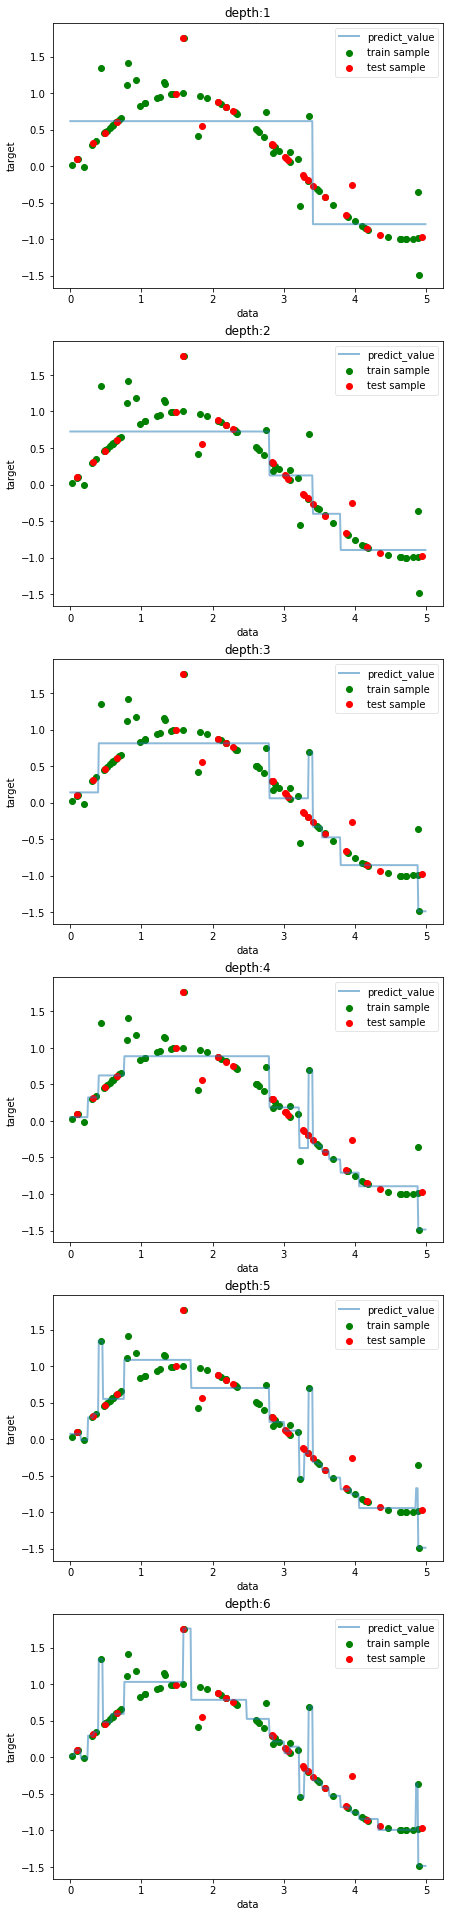

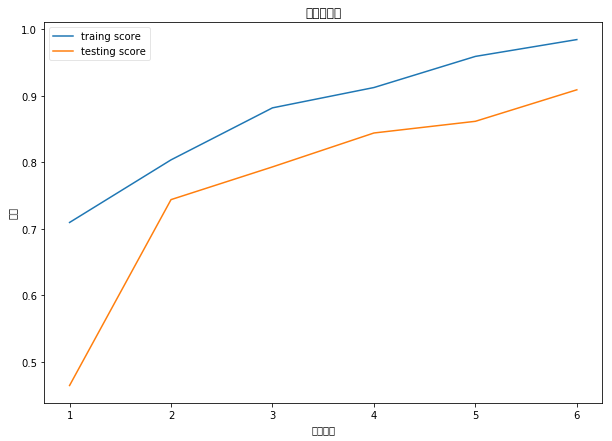

In [18]:
def test_DecisionTreeRegressor_depth(*data, maxdepth):
    '''
    回归树的深度对结果的影响
    :param maxdepth: 一个整数，它作为 DecisionTreeRegressor 的 max_depth 参数
    '''
    X_train, X_test, y_train, y_test = data
    depths = np.arange(1, maxdepth)
    training_scores = []
    testing_scores = []
    fig = plt.figure(figsize=(7, 40))
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train, y_train))
        testing_scores.append(regr.score(X_test, y_test))
        
        ax = fig.add_subplot(7, 1, depth)
        X = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
        Y = regr.predict(X)
        ax.scatter(X_train, y_train, label="train sample", c='g')
        ax.scatter(X_test, y_test, label="test sample", c='r')
        ax.plot(X, Y, label="predict_value", linewidth=2, alpha=0.5)
        ax.set_xlabel("data")
        ax.set_ylabel("target")
        ax.set_title("depth:" + str(depth))
        ax.legend(framealpha=0.5)
    plt.show()

    ## 绘图
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(depths, training_scores, label="traing score")
    ax.plot(depths, testing_scores, label="testing score")
    ax.set_xlabel("树的深度")
    ax.set_ylabel("得分")
    ax.set_title("回归决策树")
    ax.legend(framealpha=0.5)
    plt.show()

test_DecisionTreeRegressor_depth(X_train, X_test, y_train, y_test, maxdepth=7)